# Introduction

**In this little notebook, I will explore data about which there is not much information available, but I explored the data and concluded that it is data for the delivery of food and fruit orders to many Indian states in addition to exporting to the United States of America. By identifying them, proposing solutions to them, and clarifying the logical reason for those solutions, and also by looking at the data, I made technical decisions regarding some important matters in the data, such as compensating for the missing values ​​in the data and also the existing values ​​as a result of an error in data entry.**

**The data is very little and not rich in features, so I extracted some features from the data and made many visualizations on it.**

**Also, I could have made many other visualizations, but the data I extracted is not complete due to the lack of data, and therefore I only gave the warning to highlight it.**

**The data is good, and I enjoyed dealing with it a lot, and there is a lot that I could not do for several reasons, including that the data is few and incomplete, including that the code has become large and therefore affects the efficiency and speed of the software notebook and others, and therefore I satisfied with what I got in this notebook.**

**If there is an opportunity to develop later and increase the data, we can get more.**

**Let's start the work.**

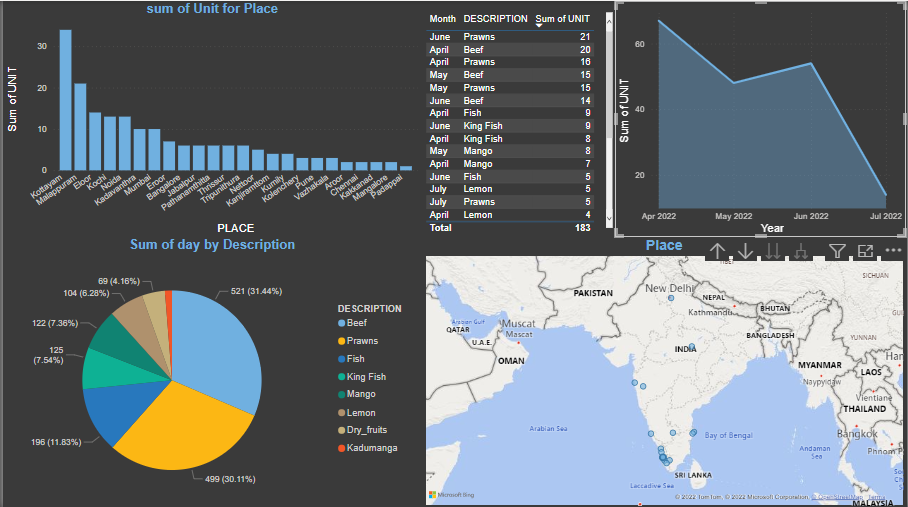

In [1]:
Agenda = {
    1:"Importing what I want.",
    2:"Loading my dara.",
    3:"Looking at the data and and check some problems.",
    4:"PowerQuery in the Power Bi Step.",
    5:"Reload data after processing on PowerQuery.",
    6:"Some Notation and Transformation.",
    7:"Dealling with Missing Values.",
    8:"Explore new features and create some."
}

Agenda

{1: 'Importing what I want.',
 2: 'Loading my dara.',
 3: 'Looking at the data and and check some problems.',
 4: 'PowerQuery in the Power Bi Step.',
 5: 'Reload data after processing on PowerQuery.',
 6: 'Some Notation and Transformation.',
 7: 'Dealling with Missing Values.',
 8: 'Explore new features and create some.'}

## 1. Importing what I want

In [2]:
# Import some basic lib

import re
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# ignore errors
import warnings
warnings.filterwarnings('ignore') 

## 2. Loading our data.

In [3]:
row_data = pd.read_excel ("../input/data-visualization/Data Visualization Assignmnet.xlsx")

## 3. Looking at the data and and check some problems.

In [4]:
row_data.shape

(111, 4)

In [5]:
row_data.head()

,DATE,DESCRIPTION,UNIT,PLACE
0,2022-04-01,Beef,1.0,Kolenchery
1,2022-04-01,Fish,1.0,Kolenchery
2,2022-04-03,Beef,2.0,Tripunithura
3,2022-04-05,Prawns,1.0,Bangalore
4,2022-04-06,Dates,1.0,Mangalore


In [6]:
row_data.tail()

,DATE,DESCRIPTION,UNIT,PLACE
106,2022-07-05,Lemon,4.0,NaN
107,2022-07-08,Beef,1.0,NaN
108,2022-07-15,Beef,1.0,NaN
109,2022-07-15,Prawns,1.0,NaN
110,2022-07-15,Lemon,1.0,NaN


In [7]:
row_data.sample(5)

,DATE,DESCRIPTION,UNIT,PLACE
46,2022-05-07,Mango,1.0,Bangalore to US
105,2022-07-05,Prawns,2.0,NaN
71,2022-05-17,Beef,2.0,Aroor
107,2022-07-08,Beef,1.0,NaN
7,2022-04-07,Mango,2.0,Pathanamthitta


In [8]:
row_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111 entries, 0 to 110
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   DATE         111 non-null    datetime64[ns]
 1   DESCRIPTION  111 non-null    object        
 2   UNIT         111 non-null    float64       
 3   PLACE        103 non-null    object        
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 3.6+ KB


**This data appears to be data for the delivery of food orders to several states over a period of time, and includes the date of the order, place of dispatch, order and quantity, so I will have a lot of fun and try to extract everything I can imagine in that data.**

In [9]:
row_data["DESCRIPTION"].value_counts()

Beef          32
Prawns        31
Fish          13
Mango         10
Lemon          9
King Fish      7
Dates          3
Dryfruits      3
Dry fruits     2
Kadumanga      1
Name: DESCRIPTION, dtype: int64

In [10]:
row_data["PLACE"].value_counts()

Malappuram                  10
Noida - UP                   6
Eloor                        6
Kottayam                     6
Mumbai                       6
United States                5
Kochi                        5
To Kottayam                  5
Eroor - Vytila               5
Pathanamthitta               4
Nettoor                      4
Bangalore to US              4
Kadavanthra                  3
Tripunithura                 3
Kolenchery                   3
Vazhakala                    3
Pune                         3
Kanjiramttom                 2
Jabalpur - Madhyapradesh     2
Chennai                      2
Kumily                       2
Mangalore - Ullal            2
Kakkanad                     2
Thrissur/ Guruvayoor         1
Bangalore                    1
malappuram                   1
Bangalore                    1
Mangalore                    1
Aroor                        1
Tripunithurra                1
Tripunithura                 1
Padappai- Tamilnadu          1
kadavant

**Here I found an error in the data entry which is `Dry fruits` and this `Dryfruits` and also spaces between texts may cause some problems in advanced data analysis so I will get rid of it and replace it with (`_`),** 

**Besides there are some inconsistent data and difference in data entry in PLACE column like `Eroor - Vytila` and this `Padappai- Tamilnadu` there is a difference in distances, also `Thrissur/ Guruvayoor` there is a difference too, I will try to solve all this.**

**Now let's look at what I can do**

## 4. PowerQuery in the Power Bi Step.

**By Using PowerQuery in the Power Bi, I solved the problems I mentioned above, in addition to many other problems such as the following:**

* **I got rid of the spaces in the last words.**
* **I got rid of strange signs such as (/).**
* **I got rid of errors in data entry.**
* **I got rid of the spaces between the texts and replaced them with (_).**
* **I got rid of the sign (-) and the spaces around it.**
* **I divided the date column into days, months and years.**
* **I removed some data that would cause some problems, such as the Date in the DESCRIPTION column, and the United_States from the PLACE column, they were removed.**

**There is a large percentage of data processing on PowerQuery in the Power Bi and there is nothing left but to deal with the missing data, which will be difficult to get rid of because the data we have is few and therefore we will try to deduce some rules from the data we have in order to deal with the missing values.**


## 5. Reload data after processing on PowerQuery.

In [11]:
data = pd.read_excel("../input/data-visuatizations/DATA VER2.xlsx")

In [12]:
data.head()

,DATE,DESCRIPTION,UNIT,PLACE,DAY,MONTH,YRAE
0,2022-04-01,Beef,1,Kolenchery,1,4,2022
1,2022-04-01,Fish,1,Kolenchery,1,4,2022
2,2022-04-03,Beef,2,Tripunithura,3,4,2022
3,2022-04-05,Prawns,1,Bangalore,5,4,2022
4,2022-04-06,Dates,1,Mangalore,6,4,2022


In [13]:
data = data[data.DESCRIPTION != "Dates"]
data = data[data.DESCRIPTION != "Kadumanga"]
data = data[data.PLACE != "United_States"]

In [14]:
data["DESCRIPTION"].value_counts()

Beef          31
Prawns        31
Fish          13
Mango          9
Lemon          8
King Fish      7
Dry_fruits     4
Name: DESCRIPTION, dtype: int64

In [15]:
data["PLACE"].value_counts()

Malappuram                11
Kottayam                   6
Mumbai                     6
Noida_UP                   5
Tripunithura               5
Eloor                      5
Kochi                      5
To_Kottayam                5
Eroor_Vytila               5
Pathanamthitta             4
Nettoor                    4
Bangalore_to_US            4
Kadavanthra                3
Kolenchery                 3
Vazhakala                  3
Pune                       3
Kanjiramttom               2
Jabalpur_Madhyapradesh     2
Chennai                    2
Kumily                     2
Mangalore_Ullal            2
Kakkanad                   2
Bangalore                  2
Padappai_Tamilnadu         1
Aroor                      1
Thrissur_Guruvayoor        1
kadavanthra                1
Name: PLACE, dtype: int64

> **Now the data is ready to move to the next stage.**

## 6. Some Notation and Transformation.

**Here I will make some adjustments to the names of the places, by getting rid of some of the excesses in the names**

In [16]:
# create a function to help us
def Place(x):
    if x == "Kolenchery":
        return "Kolenchery"
    elif x == "Tripunithura":
        return "Tripunithura"
    elif x == "Bangalore":
        return "Bangalore"
    elif x == "Mangalore":
        return "Mangalore"
    elif x == "Pathanamthitta":
        return "Pathanamthitta"
    elif x == "Pune":
        return "Pune"
    elif x == "Malappuram":
        return "Malappuram"
    elif x == "Nettoor":
        return "Nettoor"
    elif x == "Kottayam":
        return "Kottayam"
    elif x == "Noida_UP":
        return "Noida"
    elif x == "Kadavanthra":
        return "Kadavanthra"
    elif x == "Eroor_Vytila":
        return "Eroor"
    elif x == "Padappai_Tamilnadu":
        return "Padappai"
    elif x == "Jabalpur_Madhyapradesh":
        return "Jabalpur"
    elif x == "Kanjiramttom":
        return "Kanjiramttom"
    elif x == "Vazhakala":
        return "Vazhakala"
    elif x == "Mumbai":
        return "Mumbai"
    elif x == "Chennai":
        return "Chennai"
    elif x == "Kumily":
        return "Kumily"
    elif x == "Kochi":
        return "Kochi"
    elif x == "Eloor":
        return "Eloor"
    elif x == "Aroor":
        return "Aroor"
    elif x == "Kakkanad":
        return "Kakkanad"
    elif x == "kadavanthra":
        return "kadavanthra"
    elif x == "Noida_UP":
        return "Noida"
    elif x == "Bangalore_to_US":
        return "Bangalore"
    elif x == "To_Kottayam":
        return "Kottayam"
    elif x == "Mangalore_Ullal":
        return "Mangalore"
    elif x == "Thrissur_Guruvayoor":
        return "Thrissur"
    elif x == "UnKnown":
        return "UnKnown"

In [17]:
# apply the function on column
data['PLACE']=data['PLACE'].apply(Place)

<AxesSubplot:xlabel='Count', ylabel='PLACE'>

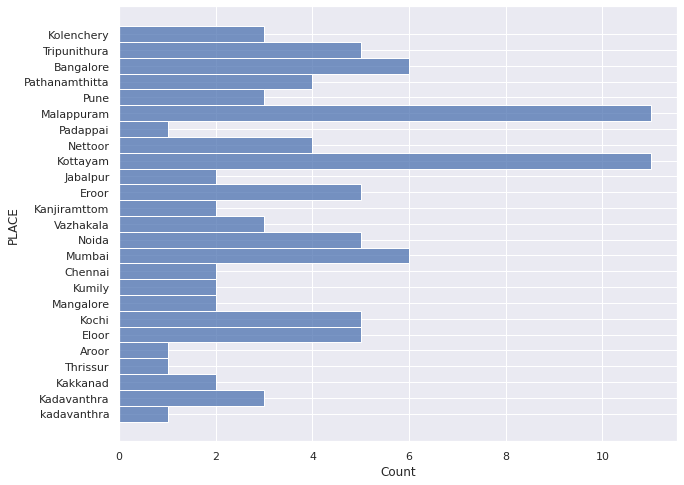

In [18]:
# visualizing the results
sns.set(rc={"figure.figsize":(10, 8)})
sns.histplot(y = data['PLACE'])

## 7. Dealling with Missing Values.

In [19]:
data.isnull().sum()

DATE           0
DESCRIPTION    0
UNIT           0
PLACE          8
DAY            0
MONTH          0
YRAE           0
dtype: int64

**There are many ways to deal with that lost data,
But I will follow another way to deal with it, which is based on the data, we will make a decision to deal with it, or in other words, replace those missing values with another.**

> **Let's take a look at work**

In [20]:
data["PLACE"].fillna("UnKnown", inplace = True)

<AxesSubplot:xlabel='Count', ylabel='DESCRIPTION'>

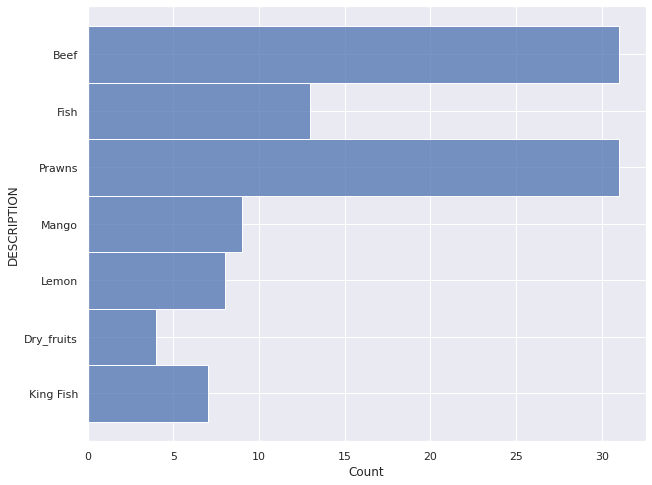

In [21]:
# visualizing the results
sns.set(rc={"figure.figsize":(10, 8)})
sns.histplot(y = data['DESCRIPTION'])

In [22]:
data.groupby('DESCRIPTION')['UNIT'].max().sort_values(ascending=False).head(10)

DESCRIPTION
King Fish     6
Prawns        6
Mango         5
Beef          4
Lemon         4
Fish          3
Dry_fruits    2
Name: UNIT, dtype: int64

<AxesSubplot:ylabel='DESCRIPTION'>

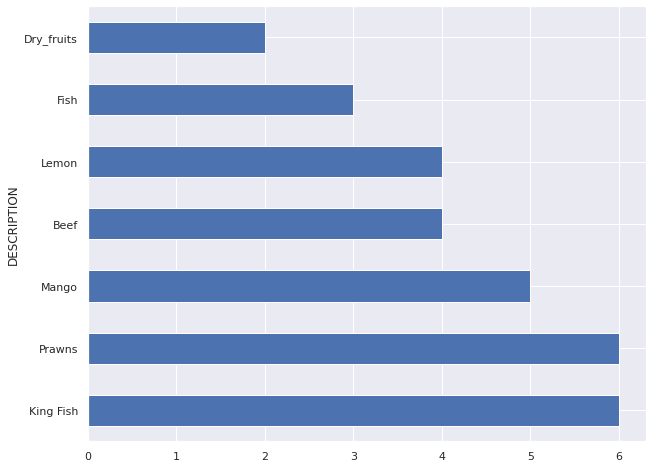

In [23]:
data.groupby('DESCRIPTION')['UNIT'].max().sort_values(ascending=False).head(10).plot(kind='barh')

<AxesSubplot:ylabel='PLACE'>

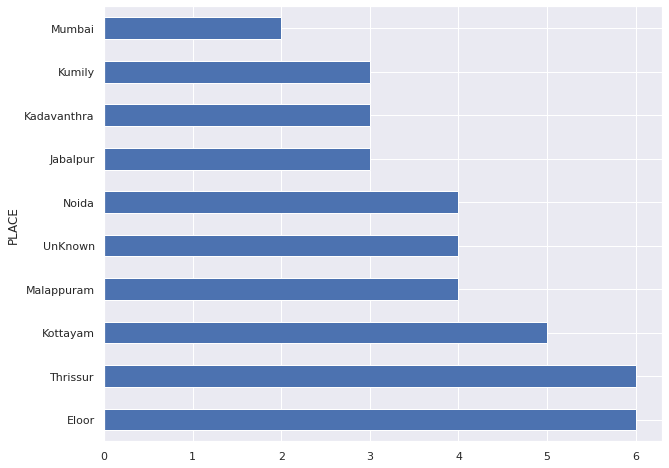

In [24]:
data.groupby('PLACE')['UNIT'].max().sort_values(ascending=False).head(10).plot(kind='barh')

In [25]:
data[(data["PLACE"] == "UnKnown") & (data["DESCRIPTION"] == "Beef")]

,DATE,DESCRIPTION,UNIT,PLACE,DAY,MONTH,YRAE
107,2022-07-08,Beef,1,UnKnown,8,7,2022
108,2022-07-15,Beef,1,UnKnown,15,7,2022


In [26]:
data[(data["PLACE"] == "UnKnown") & (data["DESCRIPTION"] == "Lemon")]

,DATE,DESCRIPTION,UNIT,PLACE,DAY,MONTH,YRAE
106,2022-07-05,Lemon,4,UnKnown,5,7,2022
110,2022-07-15,Lemon,1,UnKnown,15,7,2022


In [27]:
data[(data["PLACE"] == "UnKnown") & (data["DESCRIPTION"] == "Fish")]

,DATE,DESCRIPTION,UNIT,PLACE,DAY,MONTH,YRAE
104,2022-07-05,Fish,2,UnKnown,5,7,2022


**Through the previous analyzes, we came close to guessing the correct answers for the missing values, and consequently, I took the decision regarding compensation for the missing values, which are as follows.**

In [28]:
# First, return the column containing the missing values to its initial state.
data["PLACE"] = data["PLACE"].replace("UnKnown", np.nan)

In [29]:
data["PLACE"].loc[103:105]= data["PLACE"].loc[103:105].replace(np.nan, "Kottayam")

In [30]:
data["PLACE"].loc[106:109]= data["PLACE"].loc[106:109].replace(np.nan, "Kochi")

In [31]:
data["PLACE"].loc[109:110]= data["PLACE"].loc[109:110].replace(np.nan, "Noida")

In [32]:
data.isnull().sum()

DATE           0
DESCRIPTION    0
UNIT           0
PLACE          0
DAY            0
MONTH          0
YRAE           0
dtype: int64

In [33]:
# data.to_csv("data1.csv")

## 8. Explore new features and create some.

In [34]:
data["DAY"].describe()

count    103.000000
mean      15.883495
std        7.818155
min        1.000000
25%        8.500000
50%       19.000000
75%       21.000000
max       31.000000
Name: DAY, dtype: float64

<AxesSubplot:xlabel='DAY', ylabel='Density'>

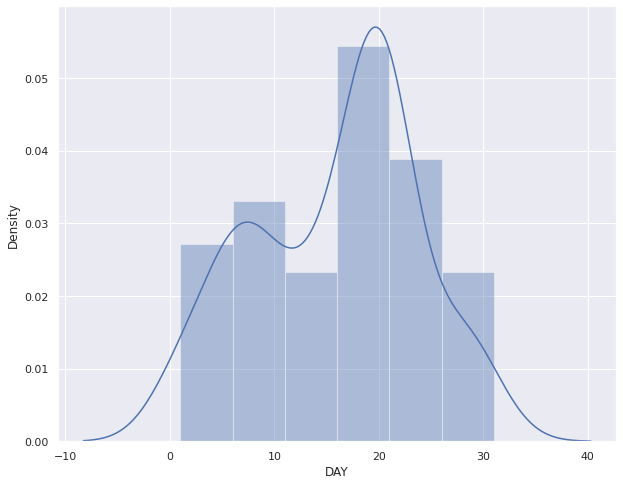

In [35]:
sns.distplot(data['DAY'])

<AxesSubplot:xlabel='DAY', ylabel='Count'>

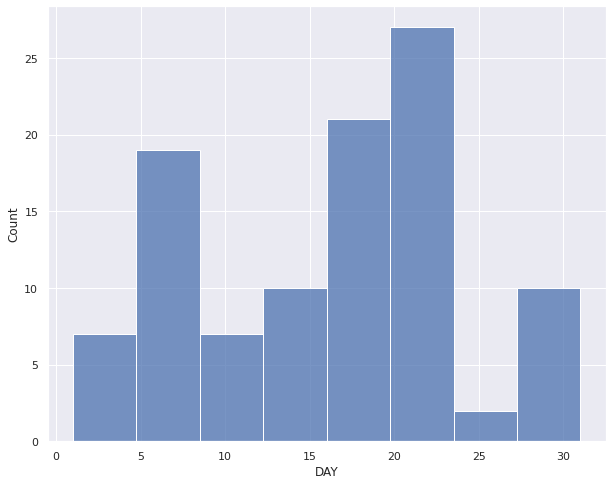

In [36]:
sns.histplot(data['DAY'])

<AxesSubplot:>

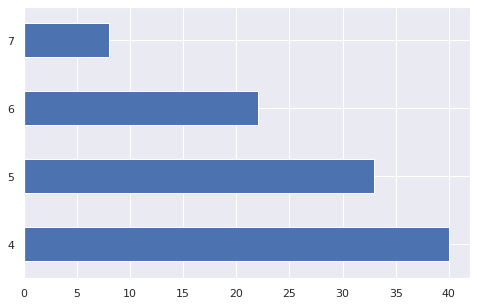

In [37]:
sns.set(rc={"figure.figsize":(8, 5)})
data["MONTH"].value_counts().plot(kind='barh')

### 8.1 Generate WEEK Feature.

In [38]:
data['WEEK']=(((((data['MONTH']-1)*30)+data['DAY'])/7)+1).astype(int)

In [39]:
data["WEEK"].unique()

array([14, 15, 16, 17, 19, 20, 21, 22, 23, 25, 26, 27, 28])

<AxesSubplot:>

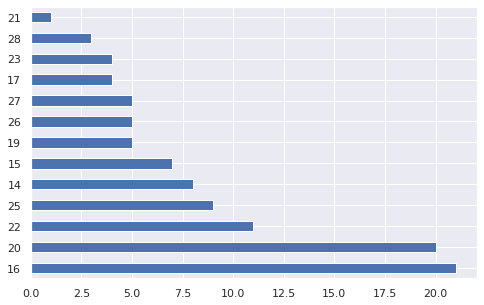

In [40]:
data["WEEK"].value_counts().plot(kind='barh')

## 9. Data visualization in general.

**Now I will visualize the data in general in order to try to clarify and show some of the things in the data, and you can say that I am currently trying to find out what that data can tell us.**

**This will become clear by trying to answer some of the questions, or by deducing some information from data visualizations.**

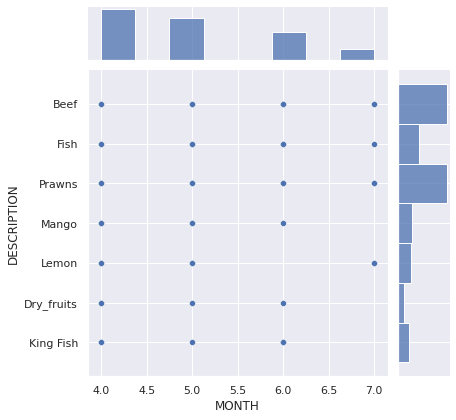

In [41]:
sns.set(rc={"figure.figsize":(8, 8)})
sns.jointplot(x = data.MONTH, y = data.DESCRIPTION)

> **The fourth and fifth months are among the most interesting months, during which the demand for all kinds increases.**

In [42]:
data["DESCRIPTION"].value_counts()

Beef          31
Prawns        31
Fish          13
Mango          9
Lemon          8
King Fish      7
Dry_fruits     4
Name: DESCRIPTION, dtype: int64

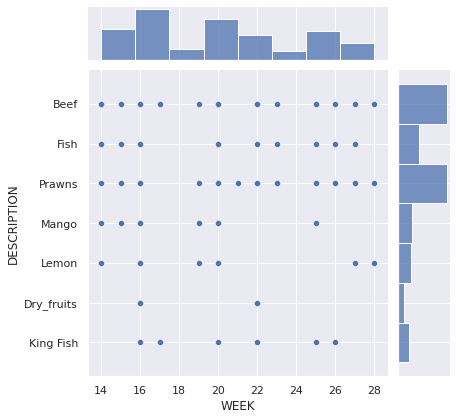

In [43]:
sns.set(rc={"figure.figsize":(8, 8)})
sns.jointplot(x = data.WEEK, y = data.DESCRIPTION)

**It seems that meat and fish are the highest in demand at all times, but looking at the fruit, the demand for it increases in the first half, but starts to decline in the second half of the figure.**

In [44]:
data.columns

Index(['DATE', 'DESCRIPTION', 'UNIT', 'PLACE', 'DAY', 'MONTH', 'YRAE', 'WEEK'], dtype='object')

<AxesSubplot:xlabel='DESCRIPTION', ylabel='count'>

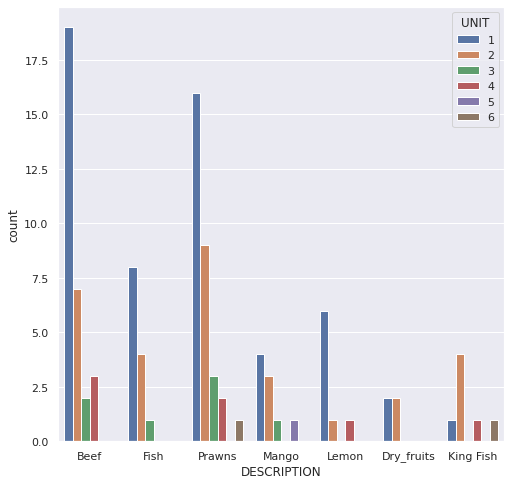

In [45]:
sns.countplot(x="DESCRIPTION",hue="UNIT" , data=data)

<AxesSubplot:xlabel='DESCRIPTION', ylabel='count'>

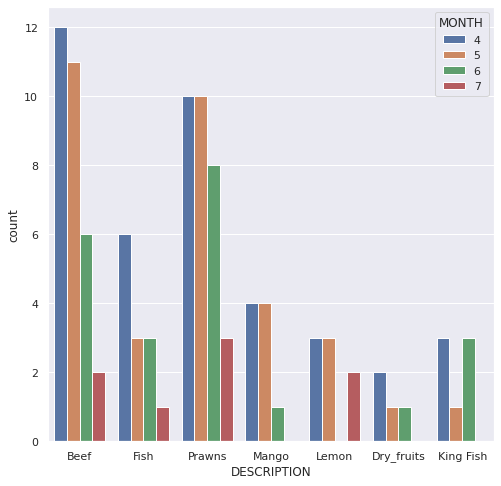

In [46]:
sns.countplot(x="DESCRIPTION",hue="MONTH" , data=data)

> **During the month of 7, there is a significant decline in demand at all levels, and it reaches until there is no demand for some types.**

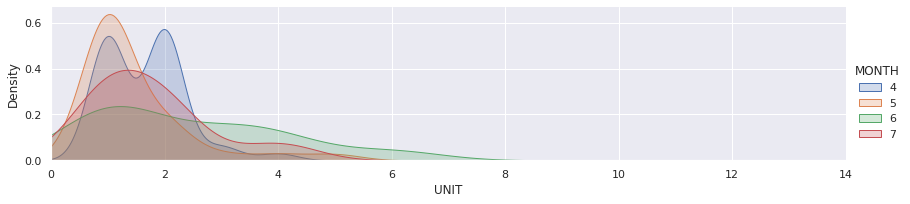

In [47]:
fig = sns.FacetGrid(data, hue="MONTH",aspect=4)
fig.map(sns.kdeplot,'UNIT',shade= True)
oldest = data['WEEK'].min()
fig.set(xlim=(0,oldest))
fig.add_legend()

> **We notice that there is a conglomeration or a significant increase in demand for all types, starting from the 1st month to the 4th month, then it declines in the 5th month, then returns again in the 6th month and stabilizes in the 7th month.**

<AxesSubplot:xlabel='UNIT', ylabel='WEEK'>

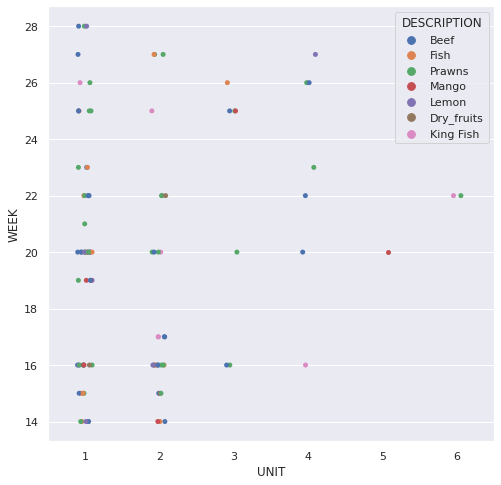

In [48]:
sns.stripplot(data.UNIT, # it it x axis
             data.WEEK,    # it is y axis
             hue = data.DESCRIPTION)

<AxesSubplot:ylabel='UNIT'>

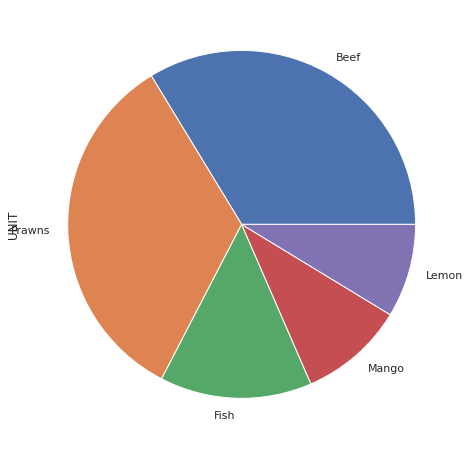

In [49]:
data.groupby('DESCRIPTION')['UNIT'].count().sort_values(ascending=False).head(5).plot(kind='pie')

**I will stop now.**